# Machine Learning

This lecture transition to the next unit in this course.  Whereas the previous lectures have largely been about data processing (how we obtain, store, and operate upon different types of data you're likely to encounter in data science tasks), this lecture will mark a shift to the question of analysis: how do we make predictions about and analyze the data we have collected?  We have already seen a little bit of this in the context of free text processing, but this lecture will shift even more to this question, starting with the topic of machine learning.

Machine learning is a fast-growing field at the current time, though we should emphasize that the initial techniques we're going to cover here (namely linear regression) pre-date the term by about 200 years (Gauss is typically credited for developing least squares regression in around 1800).  And much of the later techniques we talk about were well-studied in statistics in the early part of the century.  We're still going to use the general term machine learning to cover all these, but it is important to know that these ideas did not start with the ML community.  Rather, machine learning as a topic has grown due to the combination of three different elements: 1) gains in computing power (machine learning, as it grew out of computer science, has always been fundamentally concerned with computational algorithms), 2) massive amounts of available data (the "raw materials" for machine learning methods), and 3) some notable algorithmic advances that have occurred over the last 30 years.  To start, though, we're going to cover some of the most basic algorithms to codify the underlying principles.

## Introduction to machine learning

Machine learning, at its core, is a data driven way to write program.  Let's
say (and this isn't entirely hypothetical, as this task is now so common a benchmark in machine learning that it has become passe), you want to write a program that can
classify one of following images as a digit between 0 and 9:

![Images of digits from the MNIST dataset, a benchmark machine learning task.](digits.png)

The "traditional" way of writing a program like this is to think logically about
what short of distinguishing characteristics make up each digit, codify this
logic as a computer program, and then write it down (probably iterating as
necessary when you find that your logic didn't work for some cases).  This
general programming technique (if you could even call it that, as it is
typically just part of what we think about when we think of writing comptuer
programs) has proven extremely useful in many situations, but it also can prove
exceptionally difficult in some cases, including the image case above.  The idea
of identifying digits seems "easy" to us, but for a computer program, these
images are just 28x28 collections of pixels, and writing code that can express
high-level concepts like the general "shape" of a character is quite challenge.

The machine learning approach to a problem like this, in contrast, is the
following.  Instead of attempting to manually construct a program that produces
image classifications from pixels, we collect a \emph{data set} that consists of
a large number of images and their corresponding labels, then use a machine
learning algorithm to _automatically_ learn a kind of "program" that can produce
these correct classifications on the data set that we have.  We use the term
"program" here because, although the resulting classifier is not what we typically think
of as a program (ML "programs" usually consist of simple parameterized functions of a
particular form) it conceptually acts in the same manner. Strictly
speaking, the process described here (where we provide the algorithm both the
inputs and the target labels) is actually a subclass of machine learning
known as "supervised learning", but the same ideas we introduce below actually
also apply surprisngly similarly to the so-called unsupervised learning setting,
which we will discuss later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

## 2.1 Plotting the Data

In [2]:
# Read comma separated data
data = np.loadtxt('ex1data1.txt', delimiter=',')
x, y = data[:,0], data[:,1]
m = len(y)

In [3]:
data[:5]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [4]:
x[:5], y[:5]

(array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598]),
 array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233]))

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. There are many plotting libraries in python (see this [blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/) for a good summary of the most popular ones). 

In this course, we will be exclusively using `matplotlib` to do all our plotting. `matplotlib` is one of the most popular scientific plotting libraries in python and has extensive tools and functions to make beautiful plots. `pyplot` is a module within `matplotlib` which provides a simplified interface to `matplotlib`'s most common plotting tasks, mimicking MATLAB's plotting interface.

<div class="alert alert-block alert-warning">
You might have noticed that we have imported the `pyplot` module at the beginning of this exercise using the command `from matplotlib import pyplot`. This is rather uncommon, and if you look at python code elsewhere or in the `matplotlib` tutorials, you will see that the module is named `plt`. This is used by module renaming by using the import command `import matplotlib.pyplot as plt`. We will not using the short name of `pyplot` module in this class exercises, but you should be aware of this deviation from norm.
</div>



Text(0, 0.5, 'Profit in $10,000s')

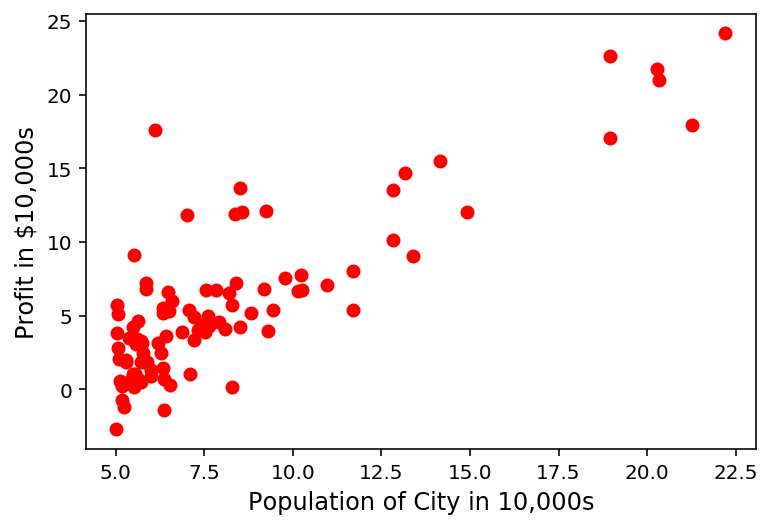

In [5]:
plt.plot(x, y, 'o', color='r')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s')

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

To understand more about gradient descent check the link <a href ='https://medium.com/analytics-vidhya/understanding-gradient-descent-8dd88a4c60e6'>here</a>.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [6]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
# initialize data array
X = np.ones((m, 2))
X[:,1] = data[:,0]

# initalize model
theta = np.zeros(2)

<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [7]:
def computeCost(X, y, theta):
    
    dt = np.dot(X, theta) - y
    
    return np.dot(dt, dt) / 2 / m

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

## Computing Cost Function

In [8]:
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')


With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07



<a id="section3"></a>
#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) and to the video lectures if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [9]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : arra_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    
    # initialize some numbers #
    
    # number of training samples
    m = len(y)
    
    # cost function history
    J_history = np.zeros(num_iters)
    
    # start loop
    theta_new = theta.copy()
    for ii in range(num_iters):
        
        # update theta
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        
        # store cost function
        J_history[ii] = computeCost(X, y, theta_new)
        
    return theta_new, J_history  

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [10]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: -3.6303, 1.1664


In [11]:
# algorithm parameters
alpha = 0.01
iterations = 1500

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

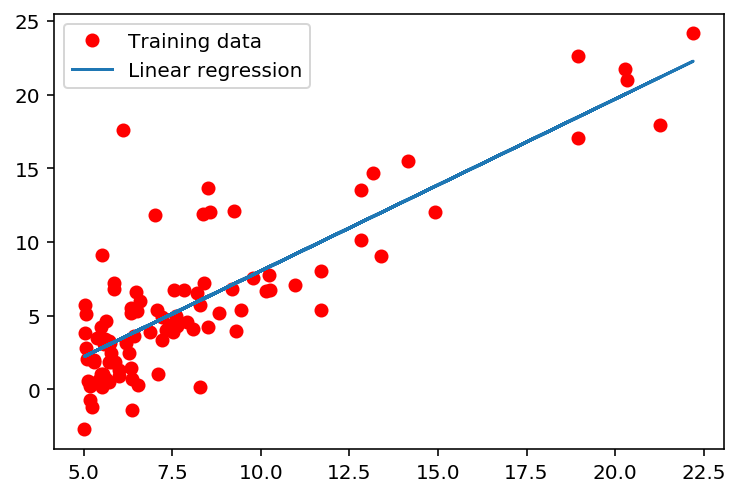

In [12]:
# plot the linear fit
plt.plot(X[:, 1], y, 'ro')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [13]:
theta_new

array([-3.87805118,  1.1912525 ])

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

<div class="alert alert-block alert-success">
Note the way that the following lines use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in `numpy`.
</div>

<div class="alert alert-block alert-success">
Note that the first argument to the `numpy` function `dot` is a python list. `numpy` can internally converts **valid** python lists to numpy arrays when explicitly provided as arguments to `numpy` functions.
</div>


In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:

![](Figures/cost_function.png)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [15]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([t0, t1])
        J_vals[ii,jj] = computeCost(X, y, t)

Text(0.5, 0, '$\\theta_1$')

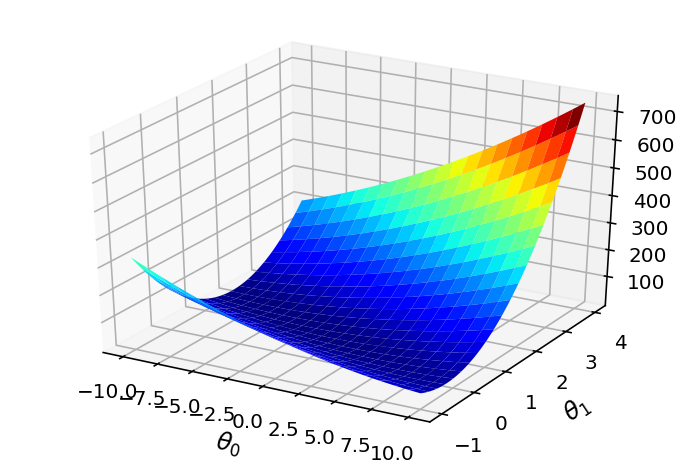

In [16]:
# make Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=5, 
                       cstride=5, antialiased=True)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

Text(0, 0.5, '$\\theta_1$')

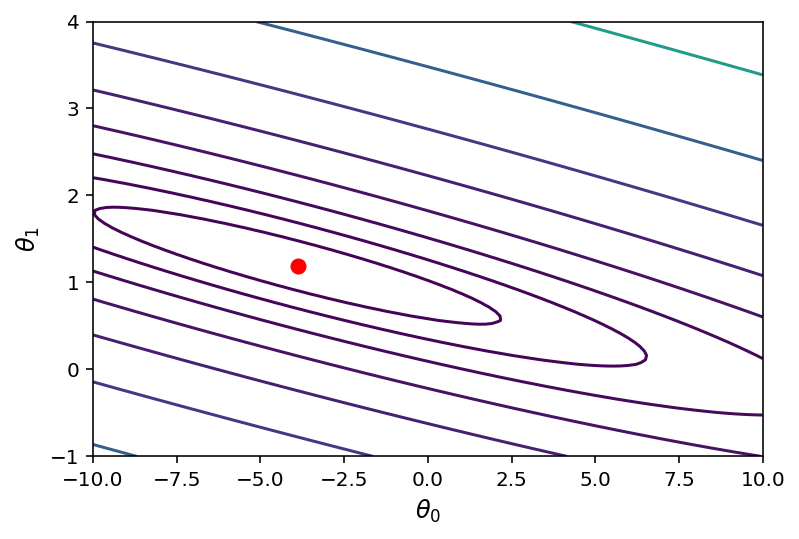

In [17]:
# make contour plot
plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'o', color='r', mew=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [18]:
# read in the data
data = np.loadtxt('ex1data2.txt', delimiter=',')
x, y = data[:,:-1], data[:,-1]
m = len(y)

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
       1       6    399900
       1       6    329900
       1       9    369000
       1       7    232000
       1       6    539900
       1       8    299900
       1       7    314900
       1       9    198999
       1       6    212000
       1       5    242500


Text(0, 0.5, 'Price of house')

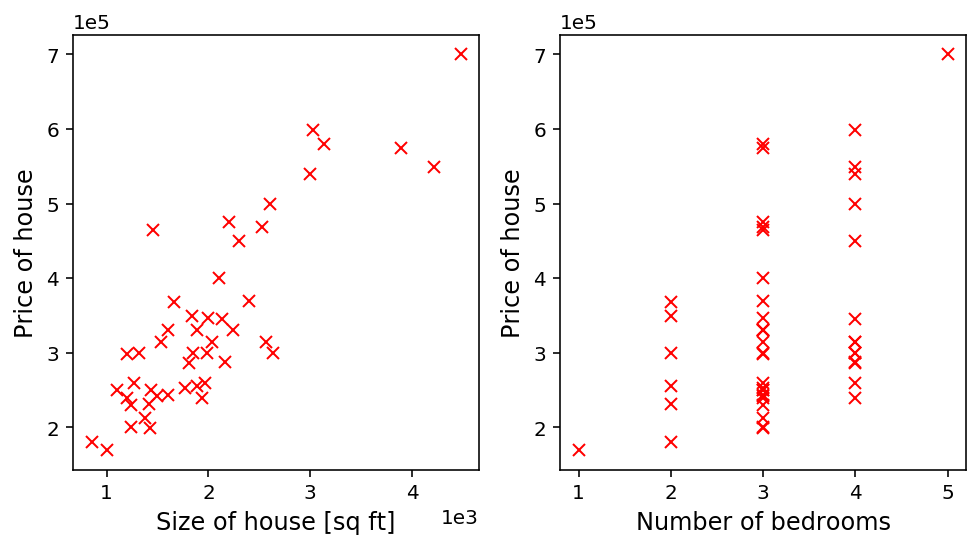

In [19]:
# plot the data
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house')

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [20]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma 

Execute the next cell to run the implemented `featureNormalize` function.

In [21]:
# normalize features
X, mu, sigma = featureNormalize(x)

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [22]:
# add mean
X = np.hstack((np.ones((X.shape[0],1)), X))

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [23]:
# gradient descent values
alpha = 0.01
iterations = 400
theta = np.zeros(3)

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

Text(0, 0.5, '$J(\\theta)$ or Loss ')

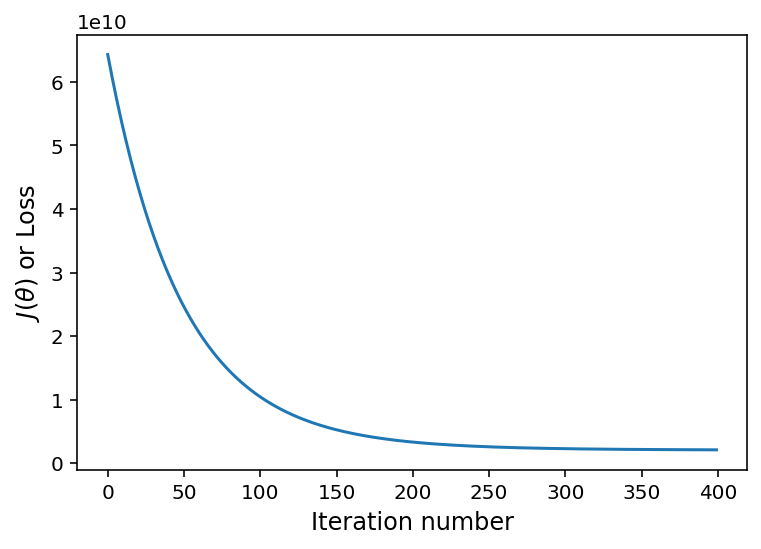

In [24]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$ or Loss ')

In [25]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = (np.array([1650, 3]) - mu) / sigma
vals = np.hstack((np.array([1]), vals))

predict = np.dot(theta_new, vals)
print ('A 1650 sq-ft 3 br house will cost $%6.2f' % predict)

A 1650 sq-ft 3 br house will cost $289221.55


## Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

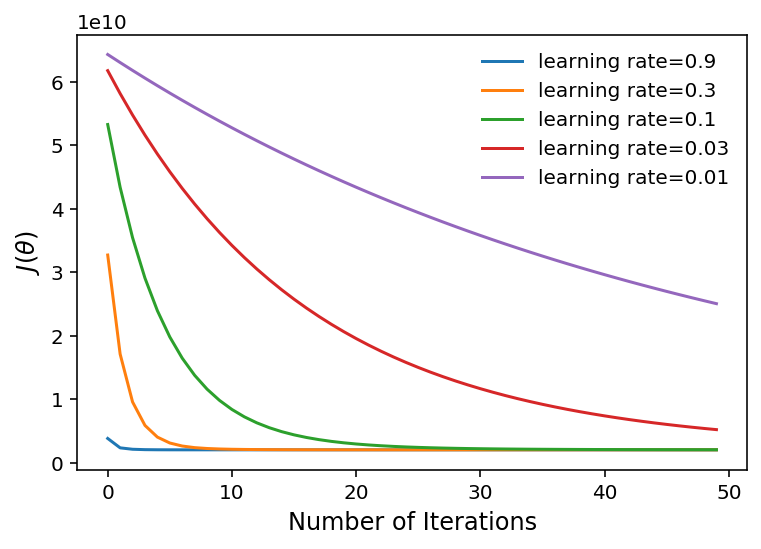

In [26]:
alphas = [0.9, 0.3, 0.1, 0.03, 0.01]
for alpha in alphas:
    theta_new, J_history = gradientDescent(X, y, theta, alpha, 50)
    plt.plot(J_history, label='learning rate={0}'.format(alpha))

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc='best', frameon=False)

# Machine learning in general

There was a lot to this example, including collecting the data, deriving the gradient, running the gradient descent algorithm, and considering different aspects of normalization.  We put them before the "general" discussion on ML because these topics are ones that you are absolutely going to encounter in practice (and least the understanding of the models, data normalization, etc, even if you don't end up writing your own gradient descent code).  But the nice aspects now, is that we can introduce virtually all the main concepts the machine learning, hopefully made substantially more concrete by the example.

To define machine learning is more general terms, we're going to first introduce some terminology.  The following elements form the foundation for mathematically defining machine learning algorithms.  We're going to define these in general terms first, but then we will see how they map on to the example in the previous section.

- **Inputs (features):** $x^{(i)} \in \mathbb{R}^n, \; i=1,\ldots, m$ <br/> Inputs, or features, are the information fed into the machine learning algorithm.  The notation here will be important, as we will refer to it frequently: each $x^{(i)}$ an $n$-dimensional vector, and there are $m$ such vectors total.  Note that while outputs in machine learning algorithms, discussed next, can be of different types (discrete, continuous, multivariate), we typically will always represent the input as a real-valued vector.
- **Outputs:** $y^{(i)} \in \mathcal{Y}, \; i=1,\ldots,m$  <br/> Outputs in a machine learning setting are quantities in some set $\mathcal{Y}$, denoting the output space.  Common output spaces will be real-valued scalars (for regression tasks), or binary or multivariate discrete quantities (for classification tasks).
- **Parameters:** $\theta \in \mathbb{R}^d$. <br/> Parameters of a machine learning algorithm are the numbers that define our prediction function.  They are the elements that we will optimize to make the prediction as good as possible.
- **Hypothesis function:** $h_\theta : \mathbb{R}^n \rightarrow \hat{\mathcal{Y}}$  <br/> A hypothesis funtion is a mapping from the input space $\mathbb{R}^n$ to the _prediction space_ $\hat{\mathcal{Y}}$.  Note that the prediction space is not necessarily the same as the output space $\mathcal{Y}$, but it represents quantities that can easily be transformed to the output space.  This distinction is a bit tricky, and in the case of the the regression task we describe in these notes, it is not relevant: in this task, both the output and prediction spaces are simply the real numbers $\mathbb{R}$.  But it will be relevant in the next set of notes, when we discuss classification, so we introduce more general terminology here.  Also note that the hypothesis function is really also a function of $\theta$, as these parameters dictate how the function makes its predictions; but from a notational standpoint we'll write $h_\theta(x)$ rather than $h(\theta,x)$ because we want to emphsize that the hypothesis function serves essentially as a mapping from inputs to outputs.
- **Loss function:** $\ell : \hat{\mathcal{Y}} \times \mathcal{Y} \rightarrow \mathbb{R}\_+$ <br/> Finally, a loss function  (a mapping from predictions and true outputs to positive real numbers, is a measure of how good a prediction is.  If the prediction is "close" to the true output, we want this quantity to be small, whereas if it is far away, we want to the quantity to be large.  We will typically write the loss function as $\ell(h_\theta(x),y)$ to denote the fact that its first argument is the prediction and its second argument is the output.